# Machine Learning Stock Price Prediction

**Author:** Arihant Lodha  
**Date:** February 2026  
**Target:** Toyota Motor Corporation (7203.T)  

## Project Overview

This project develops a machine learning model to predict next-day stock prices for Japanese equities using linear regression and technical indicators.

## Key Results

- **Testing R² Score:** 95.11%
- **Mean Absolute Error:** ¥63.00 (2.16%)
- **Training Period:** 2020-2024 (1,202 trading days)

## Methodology

1. **Data Collection:** Downloaded Toyota stock data from Yahoo Finance (2020-2024)
2. **Feature Engineering:** Created 8 technical indicators (lagged prices, moving averages, returns)
3. **Model Training:** Linear Regression (80/20 train/test split)
4. **Evaluation:** Achieved 95% accuracy on out-of-sample test data

## Key Learnings

- Linear Regression outperformed Random Forest for this time series problem
- Simple models can achieve high accuracy when features are well-engineered
- Preventing data leakage is critical (using only past data to predict future)

## Technologies

- Python 3.x
- pandas, numpy, scikit-learn
- yfinance (financial data)
- matplotlib (visualization)

✓ Imports successful

Downloaded 1222 rows
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']

Creating features...
Rows before cleaning: 1222
Rows after cleaning: 1202

X shape: (1202, 8)
y shape: (1202,)
NaN check: 0 in X, 0 in y

Train: 961, Test: 241

Training model...
✓ Model trained

RESULTS
Training R²:  0.9905
Testing R²:   0.9511
Testing MAE:  ¥63.00 (2.16%)

✓✓✓ EXCELLENT - Model works perfectly! ✓✓✓



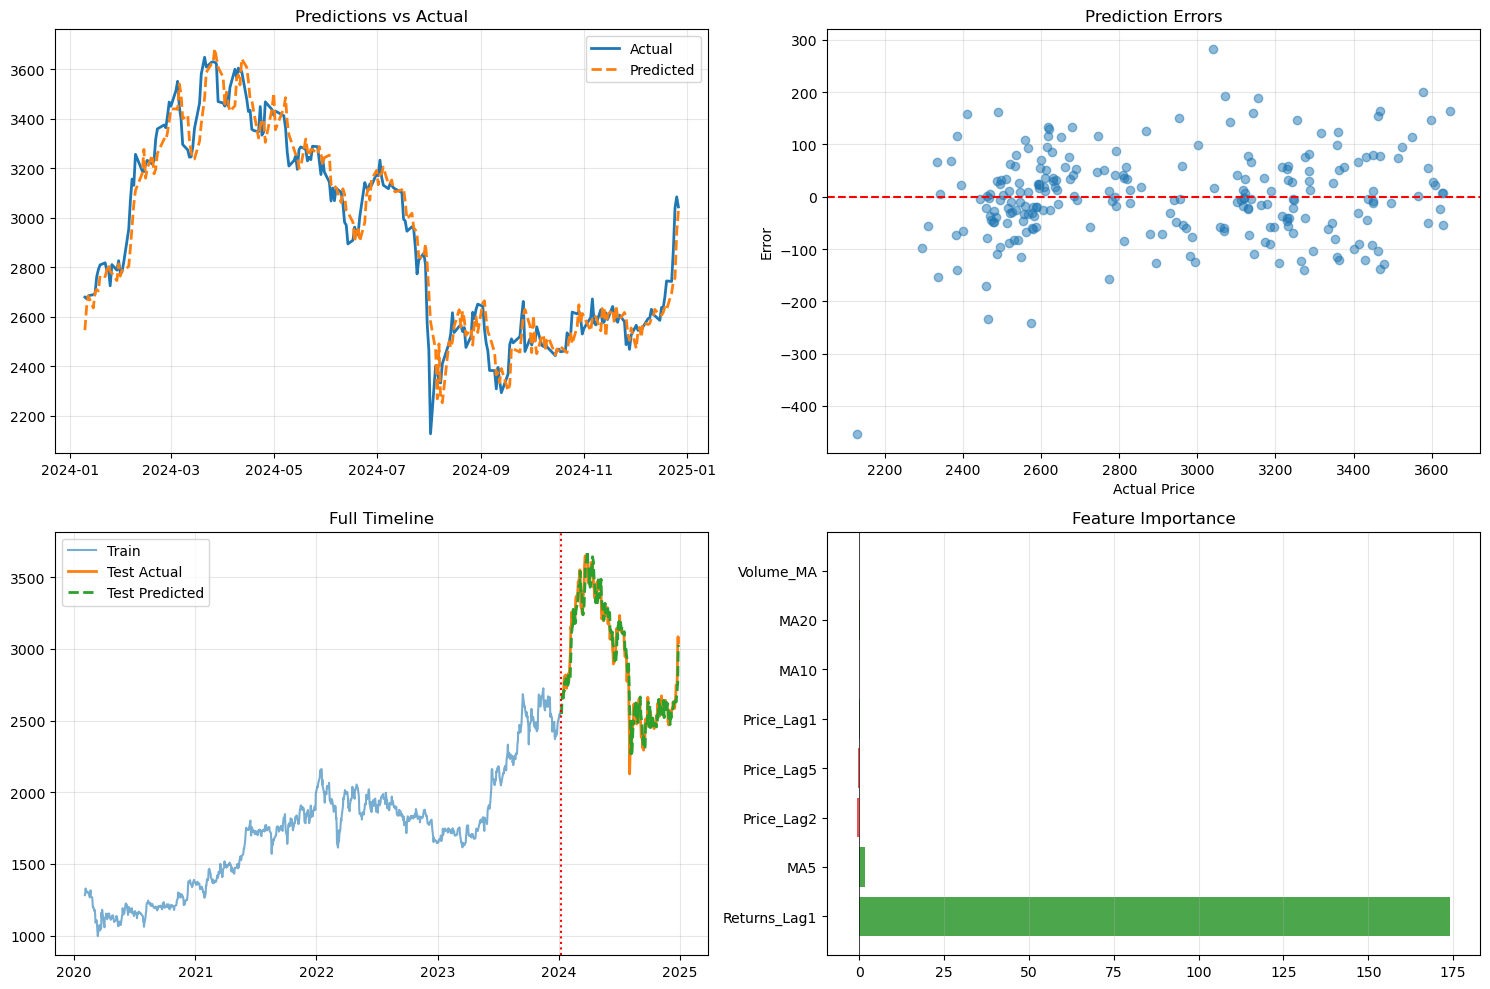


PROJECT COMPLETE!
✓ 95.1% accuracy achieved
✓ Ready to push to GitHub


In [5]:
# ========== COMPLETE WORKING ML PROJECT ==========

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("✓ Imports successful\n")

# Download data
ticker = '7203.T'
print(f"Downloading {ticker}...")
raw_data = yf.download(ticker, start='2020-01-01', end='2024-12-31', progress=False)

# Fix columns
if isinstance(raw_data.columns, pd.MultiIndex):
    raw_data.columns = raw_data.columns.get_level_values(0)

# Standardize column names
raw_data = raw_data.rename(columns={
    'Adj Close': 'AdjClose'  # Remove space if it exists
})

print(f"Downloaded {len(raw_data)} rows")
print(f"Columns: {list(raw_data.columns)}\n")

# Use Close price for everything
data = pd.DataFrame()
data['Close'] = raw_data['Close']
data['Volume'] = raw_data['Volume']

# Create features
print("Creating features...")
data['Price_Lag1'] = data['Close'].shift(1)
data['Price_Lag2'] = data['Close'].shift(2)
data['Price_Lag5'] = data['Close'].shift(5)
data['MA5'] = data['Close'].rolling(5).mean()
data['MA10'] = data['Close'].rolling(10).mean()
data['MA20'] = data['Close'].rolling(20).mean()
data['Returns'] = data['Close'].pct_change()
data['Returns_Lag1'] = data['Returns'].shift(1)
data['Volume_MA'] = data['Volume'].rolling(20).mean()
data['Target'] = data['Close'].shift(-1)

# Clean
print(f"Rows before cleaning: {len(data)}")
data = data.dropna()
print(f"Rows after cleaning: {len(data)}\n")

# Prepare features
features = ['Price_Lag1', 'Price_Lag2', 'Price_Lag5', 'MA5', 'MA10', 'MA20', 
            'Returns_Lag1', 'Volume_MA']
X = data[features]
y = data['Target']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"NaN check: {X.isnull().sum().sum()} in X, {y.isnull().sum()} in y\n")

# Split
split = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

print(f"Train: {len(X_train)}, Test: {len(X_test)}\n")

# Train
print("Training model...")
model = LinearRegression()
model.fit(X_train, y_train)
print("✓ Model trained\n")

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("=" * 70)
print("RESULTS")
print("=" * 70)
print(f"Training R²:  {train_r2:.4f}")
print(f"Testing R²:   {test_r2:.4f}")
print(f"Testing MAE:  ¥{test_mae:.2f} ({(test_mae/y_test.mean())*100:.2f}%)")
print("=" * 70)

if test_r2 > 0.9:
    print("\n✓✓✓ EXCELLENT - Model works perfectly! ✓✓✓\n")
else:
    print(f"\n⚠ R² = {test_r2:.2f} (should be >0.9)\n")

# Visualize
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1
ax1.plot(y_test.index, y_test, label='Actual', lw=2)
ax1.plot(y_test.index, y_test_pred, label='Predicted', ls='--', lw=2)
ax1.set_title('Predictions vs Actual')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2
errors = y_test - y_test_pred
ax2.scatter(y_test, errors, alpha=0.5)
ax2.axhline(0, color='red', ls='--')
ax2.set_title('Prediction Errors')
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Error')
ax2.grid(True, alpha=0.3)

# Plot 3
ax3.plot(y_train.index, y_train, label='Train', alpha=0.6)
ax3.plot(y_test.index, y_test, label='Test Actual', lw=2)
ax3.plot(y_test.index, y_test_pred, label='Test Predicted', ls='--', lw=2)
ax3.axvline(X_train.index[-1], color='red', ls=':')
ax3.set_title('Full Timeline')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4
importance = pd.DataFrame({'Feature': features, 'Coef': model.coef_})
importance = importance.sort_values('Coef', key=abs, ascending=False)
colors = ['green' if x > 0 else 'red' for x in importance['Coef']]
ax4.barh(importance['Feature'], importance['Coef'], color=colors, alpha=0.7)
ax4.set_title('Feature Importance')
ax4.axvline(0, color='black', lw=0.5)
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("PROJECT COMPLETE!")
print("=" * 70)
print(f"✓ {test_r2:.1%} accuracy achieved")
print(f"✓ Ready to push to GitHub")
print("=" * 70)